# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1, fig_2, ax_2, no_layers, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.

    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label='depth:' + str(no_layers) + k[-7:])
    ax_1.legend(loc=0, prop={'size': 6})
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.

    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label='depth' + str(no_layers) + k[-7:])
    ax_2.legend(loc=0, prop={'size': 6}) 
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc7605eda30>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc7605edd00>)


--------------------------------------------------------------------------------
hidden_dim = 32.00
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1287.32it/s]
Epoch 1: 0.8s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.55e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1351.20it/s]
Epoch 2: 0.7s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1315.16it/s]
Epoch 3: 0.8s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1318.25it/s]
Epoch 4: 0.8s to complete
    error(train)=9.74e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1322.11it/s]
Epoch 5: 0.8s to complete
    error(train)=9.34e-01, acc(train)=7.32e-01, error(valid)=9.63e-01, acc(valid)=7.27e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1312.60it/s]
Epoch 6: 0.8s to complete
    error(t

    final error(train) = 5.65e-01
    final error(valid) = 7.17e-01
    final acc(train)   = 8.20e-01
    final acc(valid)   = 7.85e-01
    run time per epoch = 1.23
    generalization gap = 0.15
--------------------------------------------------------------------------------
hidden_dim = 64.00
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 921.76it/s]
Epoch 1: 1.1s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 918.10it/s]
Epoch 2: 1.1s to complete
    error(train)=8.74e-01, acc(train)=7.47e-01, error(valid)=8.98e-01, acc(valid)=7.39e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 908.80it/s]
Epoch 3: 1.1s to complete
    error(train)=7.88e-01, acc(train)=7.69e-01, error(valid)=8.18e-01, acc(valid)=7.59e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 913.08it/s]
Epoch 4: 1.1s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.64e-01, acc(valid)=7.71e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 907.05it/s]
Epoch 5: 1.1s to complete
    error(train)=6.77e-01, acc(train)=7.95e-01, error(valid)=7.22e-01, acc(valid)=7.83e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 897.39it/s]
Epoch 6: 1.1s to complete
    error(train)=

    final error(train) = 3.39e-01
    final error(valid) = 6.59e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.09e-01
    run time per epoch = 1.66
    generalization gap = 0.32
--------------------------------------------------------------------------------
hidden_dim = 128.00
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 491.02it/s]
Epoch 1: 2.0s to complete
    error(train)=9.30e-01, acc(train)=7.32e-01, error(valid)=9.51e-01, acc(valid)=7.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 499.34it/s]
Epoch 2: 2.0s to complete
    error(train)=7.21e-01, acc(train)=7.86e-01, error(valid)=7.60e-01, acc(valid)=7.77e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 499.08it/s]
Epoch 3: 2.0s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 496.32it/s]
Epoch 4: 2.0s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 494.73it/s]
Epoch 5: 2.0s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 494.73it/s]
Epoch 6: 2.0s to complete
    error(train)=

    final error(train) = 1.56e-01
    final error(valid) = 9.83e-01
    final acc(train)   = 9.40e-01
    final acc(valid)   = 8.03e-01
    run time per epoch = 2.77
    generalization gap = 0.83


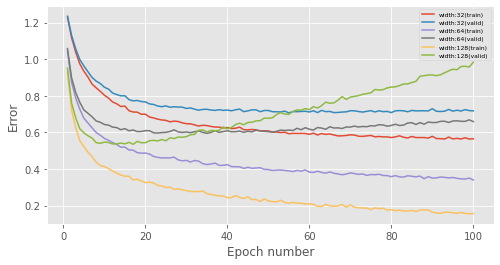

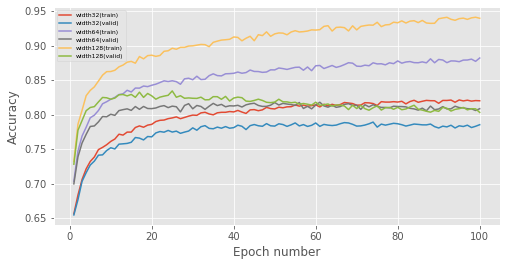

In [10]:
#Task 1 - Varying number of hidddn units

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim,= 784, 47
hidden_dim_list = [32,64,128]
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

#allows plots to be on same pgraph wihtout creatin multple sdeperate figures.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for hidden_dim in hidden_dim_list:

    print('-' * 80)
    print('hidden_dim = {0:.2f}'
          .format(hidden_dim))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create model with ONE hidden layer
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1, fig_2, ax_2, hidden_dim, notebook=False)

    

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    print('    generalization gap = {0:.2f}'.format(abs(stats[-1, keys['error(valid)']]
                                                - stats[-1, keys['error(train)']])))
    
    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
plt.show()
fig_1.savefig('task1_hu_error.pdf')
fig_2.savefig('task1_hu_accuracy.pdf')    


--------------------------------------------------------------------------------
no_layers = 1
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 504.49it/s]
Epoch 1: 2.0s to complete
    error(train)=9.01e-01, acc(train)=7.41e-01, error(valid)=9.15e-01, acc(valid)=7.37e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 500.55it/s]
Epoch 2: 2.0s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.49e-01, acc(valid)=7.74e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 507.17it/s]
Epoch 3: 2.0s to complete
    error(train)=6.16e-01, acc(train)=8.10e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 491.05it/s]
Epoch 4: 2.0s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 500.64it/s]
Epoch 5: 2.0s to complete
    error(train)=5.05e-01, acc(train)=8.40e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 496.21it/s]
Epoch 6: 2.0s to complete
    error(train)=

    final error(train) = 1.60e-01
    final error(valid) = 9.44e-01
    final acc(train)   = 9.38e-01
    final acc(valid)   = 8.12e-01
    run time per epoch = 2.73
    generalization gap = 0.78
--------------------------------------------------------------------------------
no_layers = 2
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 417.86it/s]
Epoch 1: 2.4s to complete
    error(train)=7.74e-01, acc(train)=7.67e-01, error(valid)=7.98e-01, acc(valid)=7.61e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 422.11it/s]
Epoch 2: 2.4s to complete
    error(train)=6.00e-01, acc(train)=8.12e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 408.86it/s]
Epoch 3: 2.4s to complete
    error(train)=5.14e-01, acc(train)=8.32e-01, error(valid)=5.78e-01, acc(valid)=8.14e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 416.22it/s]
Epoch 4: 2.4s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 416.04it/s]
Epoch 5: 2.4s to complete
    error(train)=4.22e-01, acc(train)=8.56e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 413.98it/s]
Epoch 6: 2.4s to complete
    error(train)=

    final error(train) = 1.10e-01
    final error(valid) = 1.57e+00
    final acc(train)   = 9.56e-01
    final acc(valid)   = 8.15e-01
    run time per epoch = 3.33
    generalization gap = 1.46
--------------------------------------------------------------------------------
no_layers = 3
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 359.72it/s]
Epoch 1: 2.8s to complete
    error(train)=7.15e-01, acc(train)=7.73e-01, error(valid)=7.42e-01, acc(valid)=7.65e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 355.44it/s]
Epoch 2: 2.8s to complete
    error(train)=5.54e-01, acc(train)=8.17e-01, error(valid)=6.07e-01, acc(valid)=8.04e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 357.59it/s]
Epoch 3: 2.8s to complete
    error(train)=4.93e-01, acc(train)=8.35e-01, error(valid)=5.63e-01, acc(valid)=8.12e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 353.83it/s]
Epoch 4: 2.8s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 347.53it/s]
Epoch 5: 2.9s to complete
    error(train)=4.04e-01, acc(train)=8.58e-01, error(valid)=5.12e-01, acc(valid)=8.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 348.17it/s]
Epoch 6: 2.9s to complete
    error(train)=

    final error(train) = 1.19e-01
    final error(valid) = 1.70e+00
    final acc(train)   = 9.56e-01
    final acc(valid)   = 8.20e-01
    run time per epoch = 3.90
    generalization gap = 1.58


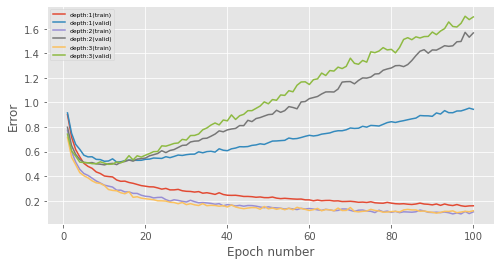

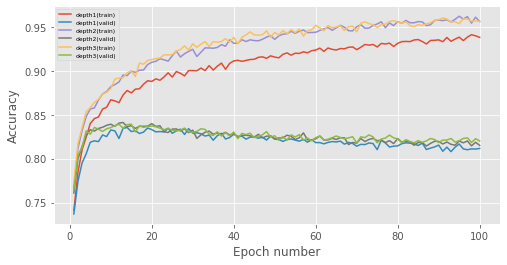

In [4]:
# Task 1b) - varying depth of the model
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, = 784, 47
hidden_dim = 128
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

rng.seed(seed)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layer
model_1 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init,
                biases_init),  # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init,
                biases_init)  # output layer
])


# Create model with TWO hidden layers
model_2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init,
                biases_init),  # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init,
                biases_init)  # output layer
])
# Create model with THREE hidden layers
model_3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init,
                biases_init),  # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init,
                biases_init)  # output layer
])

models = [model_1, model_2, model_3]
# allows plots to be on same pgraph wihtout creatin multple sdeperate figures.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for model in models:

    print('-' * 80)
    print('no_layers = {0}'
      .format(models.index(model)+ 1))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results

    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size
    valid_data.batch_size = batch_size
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2  = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1, fig_2, ax_2, models.index(model) + 1, notebook= False)



    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    print('    generalization gap = {0:.2f}'.format(abs(stats[-1, keys['error(valid)']]
                                                - stats[-1, keys['error(train)']])))
    
    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
plt.show()
fig_1.savefig('task1_vlayers_error.pdf')
fig_2.savefig('task1_vlayers_accuracy.pdf')    

  

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats_task2(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1, ax_2, label, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.

    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                 abs(stats[1:, keys['error(valid)']]
                - stats[1:, keys['error(train)']]), '--', label= label + ' (error gap)')
    ax_1.legend(loc=2, prop={'size': 6})
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Generalization Gap')

    # Plot the change in the validation and training set accuracy over training.

    ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys['acc(valid)']], '-', label= label + ' (accuracy)')
    ax_2.legend(loc=1, prop={'size': 6}) 
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, ax_2

--------------------------------------------------------------------------------
incl_prob = 0.70
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 310.77it/s]
Epoch 1: 3.2s to complete
    error(train)=2.60e+00, acc(train)=3.93e-01, error(valid)=2.60e+00, acc(valid)=3.96e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 307.67it/s]
Epoch 2: 3.3s to complete
    error(train)=1.96e+00, acc(train)=5.07e-01, error(valid)=1.96e+00, acc(valid)=5.06e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 291.93it/s]
Epoch 3: 3.4s to complete
    error(train)=1.69e+00, acc(train)=5.58e-01, error(valid)=1.69e+00, acc(valid)=5.54e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 308.66it/s]
Epoch 4: 3.2s to complete
    error(train)=1.54e+00, acc(train)=5.85e-01, error(valid)=1.54e+00, acc(valid)=5.84e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 297.56it/s]
Epoch 5: 3.4s to complete
    error(train)=1.42e+00, acc(train)=6.06e-01, error(valid)=1.42e+00, acc(valid)=6.05e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 308.60it/s]
Epoch 6: 3.2s to complete
    error(train)=

    final error(train) = 5.18e-01
    final error(valid) = 5.48e-01
    final acc(train)   = 8.25e-01
    final acc(valid)   = 8.17e-01
    run time per epoch = 4.39
    generalization gap = 0.03
--------------------------------------------------------------------------------
incl_prob = 0.90
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 315.97it/s]
Epoch 1: 3.2s to complete
    error(train)=1.64e+00, acc(train)=5.67e-01, error(valid)=1.64e+00, acc(valid)=5.65e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 321.35it/s]
Epoch 2: 3.1s to complete
    error(train)=1.31e+00, acc(train)=6.33e-01, error(valid)=1.32e+00, acc(valid)=6.33e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 318.76it/s]
Epoch 3: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.71e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 318.59it/s]
Epoch 4: 3.1s to complete
    error(train)=1.04e+00, acc(train)=6.97e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 318.61it/s]
Epoch 5: 3.1s to complete
    error(train)=9.57e-01, acc(train)=7.19e-01, error(valid)=9.64e-01, acc(valid)=7.14e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 316.91it/s]
Epoch 6: 3.2s to complete
    error(train)=

    final error(train) = 3.22e-01
    final error(valid) = 4.17e-01
    final acc(train)   = 8.84e-01
    final acc(valid)   = 8.56e-01
    run time per epoch = 4.31
    generalization gap = 0.09
--------------------------------------------------------------------------------
incl_prob = 0.95
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.64it/s]
Epoch 1: 3.1s to complete
    error(train)=1.48e+00, acc(train)=5.97e-01, error(valid)=1.48e+00, acc(valid)=5.97e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.85it/s]
Epoch 2: 3.1s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.20e+00, acc(valid)=6.60e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.10it/s]
Epoch 3: 3.1s to complete
    error(train)=1.06e+00, acc(train)=6.95e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 320.96it/s]
Epoch 4: 3.1s to complete
    error(train)=9.52e-01, acc(train)=7.21e-01, error(valid)=9.59e-01, acc(valid)=7.19e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 320.76it/s]
Epoch 5: 3.1s to complete
    error(train)=8.70e-01, acc(train)=7.42e-01, error(valid)=8.80e-01, acc(valid)=7.38e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 320.01it/s]
Epoch 6: 3.1s to complete
    error(train)=

    final error(train) = 2.72e-01
    final error(valid) = 4.16e-01
    final acc(train)   = 9.01e-01
    final acc(valid)   = 8.61e-01
    run time per epoch = 4.29
    generalization gap = 0.14


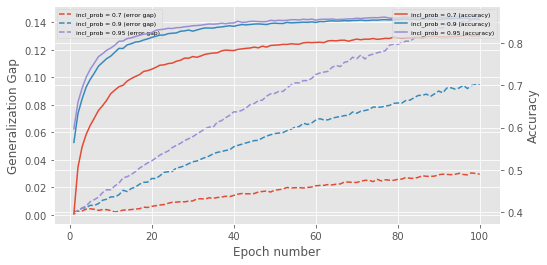

In [4]:
#Task 2 Experiment - Varying dropout probability

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim= 784, 47, 128
incl_probs = [0.7,0.9,0.95]
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

#allows plots to be on same pgraph wihtout creatin multple sdeperate figures.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
ax_2 = ax_1.twinx()
for incl_prob in incl_probs:

    print('-' * 80)
    print('incl_prob = {0:.2f}'
          .format(incl_prob))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create model with THREE hidden layers
    model = MultipleLayerModel([
    DropoutLayer(rng = rng, incl_prob = incl_prob),    
    AffineLayer(input_dim, hidden_dim, weights_init,
                biases_init),  # first hidden layer
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),    
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # second hidden layer
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),   
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # third hidden layer
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),    
    AffineLayer(hidden_dim, output_dim, weights_init,
                biases_init)  # output layer
    ])

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_task2(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1,ax_2, str(incl_prob), notebook=False)

    

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    print('    generalization gap = {0:.2f}'.format(abs(stats[-1, keys['error(valid)']]
                                                - stats[-1, keys['error(train)']])))
    
    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
plt.show()
fig_1.savefig('task2_dout_axis.pdf')
#fig_2.savefig('task1_hu_accuracy.pdf')  

--------------------------------------------------------------------------------
Baseline
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 360.09it/s]
Epoch 1: 2.8s to complete
    error(train)=1.32e+00, acc(train)=6.30e-01, error(valid)=1.32e+00, acc(valid)=6.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 361.14it/s]
Epoch 2: 2.8s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 362.22it/s]
Epoch 3: 2.8s to complete
    error(train)=9.65e-01, acc(train)=7.21e-01, error(valid)=9.76e-01, acc(valid)=7.17e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 360.76it/s]
Epoch 4: 2.8s to complete
    error(train)=8.72e-01, acc(train)=7.45e-01, error(valid)=8.86e-01, acc(valid)=7.39e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 361.46it/s]
Epoch 5: 2.8s to complete
    error(train)=8.06e-01, acc(train)=7.60e-01, error(valid)=8.23e-01, acc(valid)=7.54e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 358.24it/s]
Epoch 6: 2.8s to complete
    error(train)=

    final error(train) = 2.37e-01
    final error(valid) = 5.26e-01
    final acc(train)   = 9.17e-01
    final acc(valid)   = 8.40e-01
    run time per epoch = 3.80
    generalization gap = 0.29
--------------------------------------------------------------------------------
L1: $\beta = 10^{-4}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 333.01it/s]
Epoch 1: 3.0s to complete
    error(train)=1.35e+00, acc(train)=6.28e-01, error(valid)=1.37e+00, acc(valid)=6.20e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 332.53it/s]
Epoch 2: 3.0s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 325.27it/s]
Epoch 3: 3.1s to complete
    error(train)=8.78e-01, acc(train)=7.43e-01, error(valid)=9.24e-01, acc(valid)=7.25e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 332.00it/s]
Epoch 4: 3.0s to complete
    error(train)=7.86e-01, acc(train)=7.64e-01, error(valid)=8.41e-01, acc(valid)=7.50e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.26it/s]
Epoch 5: 3.1s to complete
    error(train)=7.24e-01, acc(train)=7.82e-01, error(valid)=7.86e-01, acc(valid)=7.66e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.91it/s]
Epoch 6: 3.1s to complete
    error(train)=

    final error(train) = 1.57e-01
    final error(valid) = 7.10e-01
    final acc(train)   = 9.48e-01
    final acc(valid)   = 8.14e-01
    run time per epoch = 4.00
    generalization gap = 0.55
--------------------------------------------------------------------------------
L1: $\beta = 10^{-3}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 332.75it/s]
Epoch 1: 3.0s to complete
    error(train)=1.35e+00, acc(train)=6.27e-01, error(valid)=1.37e+00, acc(valid)=6.18e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 333.68it/s]
Epoch 2: 3.0s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 324.80it/s]
Epoch 3: 3.1s to complete
    error(train)=8.75e-01, acc(train)=7.43e-01, error(valid)=9.18e-01, acc(valid)=7.26e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 327.36it/s]
Epoch 4: 3.1s to complete
    error(train)=7.83e-01, acc(train)=7.65e-01, error(valid)=8.35e-01, acc(valid)=7.51e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 332.11it/s]
Epoch 5: 3.0s to complete
    error(train)=7.19e-01, acc(train)=7.82e-01, error(valid)=7.81e-01, acc(valid)=7.68e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 330.97it/s]
Epoch 6: 3.0s to complete
    error(train)=

    final error(train) = 1.53e-01
    final error(valid) = 6.99e-01
    final acc(train)   = 9.50e-01
    final acc(valid)   = 8.13e-01
    run time per epoch = 3.99
    generalization gap = 0.55
--------------------------------------------------------------------------------
L1: $\beta = 10^{-1}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 333.93it/s]
Epoch 1: 3.0s to complete
    error(train)=1.35e+00, acc(train)=6.28e-01, error(valid)=1.36e+00, acc(valid)=6.19e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 334.74it/s]
Epoch 2: 3.0s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 336.13it/s]
Epoch 3: 3.0s to complete
    error(train)=8.74e-01, acc(train)=7.43e-01, error(valid)=9.18e-01, acc(valid)=7.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 335.27it/s]
Epoch 4: 3.0s to complete
    error(train)=7.84e-01, acc(train)=7.65e-01, error(valid)=8.36e-01, acc(valid)=7.50e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 334.09it/s]
Epoch 5: 3.0s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.81e-01, acc(valid)=7.68e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 333.08it/s]
Epoch 6: 3.0s to complete
    error(train)=

    final error(train) = 1.54e-01
    final error(valid) = 7.05e-01
    final acc(train)   = 9.49e-01
    final acc(valid)   = 8.18e-01
    run time per epoch = 3.98
    generalization gap = 0.55
--------------------------------------------------------------------------------
L2: $\beta = 10^{-4}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 356.35it/s]
Epoch 1: 2.8s to complete
    error(train)=1.32e+00, acc(train)=6.30e-01, error(valid)=1.32e+00, acc(valid)=6.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 358.63it/s]
Epoch 2: 2.8s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 358.85it/s]
Epoch 3: 2.8s to complete
    error(train)=9.66e-01, acc(train)=7.20e-01, error(valid)=9.77e-01, acc(valid)=7.17e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 359.61it/s]
Epoch 4: 2.8s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.88e-01, acc(valid)=7.38e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 356.66it/s]
Epoch 5: 2.8s to complete
    error(train)=8.06e-01, acc(train)=7.60e-01, error(valid)=8.24e-01, acc(valid)=7.54e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 348.03it/s]
Epoch 6: 2.9s to complete
    error(train)=

    final error(train) = 2.41e-01
    final error(valid) = 5.24e-01
    final acc(train)   = 9.14e-01
    final acc(valid)   = 8.39e-01
    run time per epoch = 3.94
    generalization gap = 0.28
--------------------------------------------------------------------------------
L2: $\beta = 10^{-3}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 355.92it/s]
Epoch 1: 2.8s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 357.19it/s]
Epoch 2: 2.8s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 357.13it/s]
Epoch 3: 2.8s to complete
    error(train)=9.69e-01, acc(train)=7.20e-01, error(valid)=9.80e-01, acc(valid)=7.16e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 355.79it/s]
Epoch 4: 2.8s to complete
    error(train)=8.77e-01, acc(train)=7.44e-01, error(valid)=8.91e-01, acc(valid)=7.39e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 354.09it/s]
Epoch 5: 2.8s to complete
    error(train)=8.11e-01, acc(train)=7.59e-01, error(valid)=8.28e-01, acc(valid)=7.52e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 355.59it/s]
Epoch 6: 2.8s to complete
    error(train)=

    final error(train) = 2.58e-01
    final error(valid) = 4.97e-01
    final acc(train)   = 9.09e-01
    final acc(valid)   = 8.43e-01
    run time per epoch = 3.89
    generalization gap = 0.24
--------------------------------------------------------------------------------
L2: $\beta = 10^{-1}$
--------------------------------------------------------------------------------


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 355.00it/s]
Epoch 1: 2.8s to complete
    error(train)=1.44e+00, acc(train)=6.05e-01, error(valid)=1.45e+00, acc(valid)=6.03e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 359.01it/s]
Epoch 2: 2.8s to complete
    error(train)=1.23e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.57e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 360.09it/s]
Epoch 3: 2.8s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 361.01it/s]
Epoch 4: 2.8s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 359.46it/s]
Epoch 5: 2.8s to complete
    error(train)=9.55e-01, acc(train)=7.24e-01, error(valid)=9.65e-01, acc(valid)=7.20e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 358.37it/s]
Epoch 6: 2.8s to complete
    error(train)=

    final error(train) = 3.58e-01
    final error(valid) = 4.74e-01
    final acc(train)   = 8.76e-01
    final acc(valid)   = 8.41e-01
    run time per epoch = 3.83
    generalization gap = 0.12


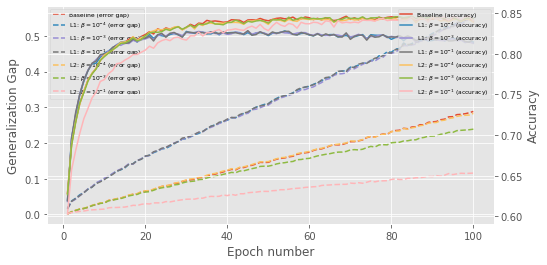

In [38]:
#Task 2b Experiment - Varying l1/l2 penalty coefficient
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# Setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim= 784, 47, 128
l1_l2_penalties = [None, L1Penalty(10**-4),L1Penalty(10**-3),L1Penalty(10**-1),
                   L2Penalty(10**-4),L2Penalty(10**-3),L2Penalty(10**-1) ]
labels = ['Baseline','L1: $\\beta = 10^{-4}$', 'L1: $\\beta = 10^{-3}$', 'L1: $\\beta = 10^{-1}$',
            'L2: $\\beta = 10^{-4}$', 'L2: $\\beta = 10^{-3}$', 'L2: $\\beta = 10^{-1}$' ]
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

#allows plots to be on same pgraph wihtout creatin multple sdeperate figures.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
ax_2 = ax_1.twinx()
for penalty, label in zip(l1_l2_penalties, labels):

    print('-' * 80)
    print(label)
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    # Create model with THREE hidden layers
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init,
                biases_init),  # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init,
                biases_init),  # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init,
                biases_init, weights_penalty= penalty, biases_penalty= penalty)  # output layer
    ])

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_task2(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_1, ax_1,ax_2, label, notebook=False)

    

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    print('    generalization gap = {0:.2f}'.format(abs(stats[-1, keys['error(valid)']]
                                                - stats[-1, keys['error(train)']])))
    
    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
plt.show()
fig_1.savefig('task2_l1l2_axis.pdf')
#fig_2.savefig('task1_hu_accuracy.pdf')  